Read NEON AOP hyperspectral flightline data using Python. 

If you are interested in learning how to do this for flightline NEON AOP hyperspectral data,
please see <a href="/neon-aop-hdf5-py" target="_blank"> NEON AOP Hyperspectral Data in HDF5 format with Python - Flightlines</a>.

### Learning Objectives

* Use Python packages `h5py, and gdal`.
* Use the package `h5py` and the `visititems` functionality to read an HDF5 file
and view data attributes.
* Read the data ignore value and scaling factor and apply these values to produce
a cleaned reflectance array.
* Extract and plot a single band of reflectance data
* Plot a histogram of reflectance values to visualize the range and distribution
of values.
* Subset an hdf5 reflectance file from the full flightline to a smaller region
of interest (if you complete the optional extension).
* Apply a histogram stretch and adaptive equalization to improve the contrast
of an image (if you complete the optional extension) .

### Download Data

To complete this tutorial, you will use data available from the NEON 2017 Data
Institute.

This tutorial uses the following files:

<ul>
    <li> <a href="https://www.neonscience.org/sites/default/files/neon_aop_spectral_python_functions_tiled_data.zip">neon_aop_spectral_python_functions_tiled_data.zip (10 KB)</a> <- Click to Download</li>
    <li><a href="https://ndownloader.figshare.com/files/25752665" target="_blank">NEON_D02_SERC_DP3_368000_4306000_reflectance.h5 (618 MB)</a> <- Click to Download</li>
</ul>

<a href="https://ndownloader.figshare.com/files/25752665" class="link--button link--arrow">
Download Dataset</a>

The LiDAR and imagery data used to create this raster teaching data subset
were collected over the
<a href="http://www.neonscience.org/" target="_blank"> National Ecological Observatory Network's</a>
<a href="http://www.neonscience.org/science-design/field-sites/" target="_blank" >field sites</a>
and processed at NEON headquarters.
The entire dataset can be accessed on the
<a href="http://data.neonscience.org" target="_blank"> NEON data portal</a>.


In [ ]:
!pip install pysptools==0.14.2 cvxopt
!pip3 install h5py==2.9.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pysptools: filename=pysptools-0.14.2-py3-none-any.whl size=6154070 sha256=1e20f1dbe79427a00e12657fc9d8ef5eadc5d960b0ef3d0c36aa627fc61bb708
  Stored in directory: /root/.cache/pip/wheels/78/8c/05/cf42c0b9778ec8bb8e850b7246a6be06075c285d612e153553
Successfully built pysptools
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.9/287.9 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for h5py
  Running setup.py clean for h5py
Failed to build h5py
ERROR: Could not build wheels for h5py, which is required to install pyproject.toml-based projects


In [ ]:
!wget https://www.neonscience.org/sites/default/files/neon_aop_spectral_python_functions_tiled_data.zip
!unzip neon_aop_spectral_python_functions_tiled_data.zip

--2023-10-18 17:27:01--  https://www.neonscience.org/sites/default/files/neon_aop_spectral_python_functions_tiled_data.zip
Resolving www.neonscience.org (www.neonscience.org)... 34.238.11.122
Connecting to www.neonscience.org (www.neonscience.org)|34.238.11.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10040 (9.8K) [application/zip]
Saving to: ‘neon_aop_spectral_python_functions_tiled_data.zip’

neon_aop_spectral_p 100%[===================>]   9.80K  --.-KB/s    in 0s      

2023-10-18 17:27:01 (103 MB/s) - ‘neon_aop_spectral_python_functions_tiled_data.zip’ saved [10040/10040]

Archive:  neon_aop_spectral_python_functions_tiled_data.zip
   creating: neon_aop_spectral_python_functions_tiled_data/
  inflating: neon_aop_spectral_python_functions_tiled_data/aop_h5refl2array.py  
  inflating: neon_aop_spectral_python_functions_tiled_data/linearStretch.py  
  inflating: neon_aop_spectral_python_functions_tiled_data/neon_aop_hyperspectral.py  
  inflating: neo

In [ ]:
# https://drive.google.com/file/d/1vwwvHzD-bo1CQkPduKVqRIMHYbVK-6Eq/view?usp=sharing
import gdown
gdown.download(
        f"https://drive.google.com/uc?export=download&confirm=pbef&id=1vwwvHzD-bo1CQkPduKVqRIMHYbVK-6Eq",
        '/content/NEON_D02_SERC_DP3_368000_4306000_reflectance.h5'
    )

Downloading...
From: https://drive.google.com/uc?export=download&confirm=pbef&id=1vwwvHzD-bo1CQkPduKVqRIMHYbVK-6Eq
To: /content/NEON_D02_SERC_DP3_368000_4306000_reflectance.h5
100%|██████████| 618M/618M [00:07<00:00, 81.4MB/s]


'/content/NEON_D02_SERC_DP3_368000_4306000_reflectance.h5'

Hyperspectral remote sensing data is a useful tool for measuring changes to our
environment at the Earth’s surface. In this tutorial we explore how to extract
information from a tile (1000m x 1000m x 426 bands) of NEON AOP orthorectified surface reflectance data, stored in hdf5 format. For more information on this data product, refer to the <a href="http://data.neonscience.org/data-products/DP3.30006.001" target="_blank">NEON Data Product Catalog</a>.

#### Mapping the Invisible: Introduction to Spectral Remote Sensing

For more information on spectral remote sensing watch this video.

<iframe width="560" height="315" src="https://www.youtube.com/embed/3iaFzafWJQE" frameborder="0" allowfullscreen></iframe>


## Set up


In [ ]:
import numpy as np
import h5py
#import gdal, osr
import os
import matplotlib.pyplot as plt

ModuleNotFoundError: ignored

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Read in hdf5

```f = h5py.File('file.h5','r')``` reads in an h5 file to the variable f.


In [ ]:
help(h5py)

Help on package h5py:

NAME
    h5py

DESCRIPTION
    This is the h5py package, a Python interface to the HDF5
    scientific data format.

PACKAGE CONTENTS
    _conv
    _errors
    _hl (package)
    _objects
    _proxy
    _selector
    defs
    h5
    h5a
    h5ac
    h5d
    h5ds
    h5f
    h5fd
    h5g
    h5i
    h5l
    h5o
    h5p
    h5pl
    h5py_warnings
    h5r
    h5s
    h5t
    h5z
    ipy_completer
    tests (package)
    utils
    version

SUBMODULES
    filters

FUNCTIONS
    check_enum_dtype(...)
        If the dtype represents an HDF5 enumerated type, returns the dictionary
        mapping string names to integer values.
        
        Returns None if the dtype does not represent an HDF5 enumerated type.
    
    check_opaque_dtype(...)
        Return True if the dtype given is tagged to be stored as HDF5 opaque data
    
    check_ref_dtype(...)
        If the dtype represents an HDF5 reference type, returns the reference
        class (either Reference or Regio

In [ ]:
h5py.File?

In [ ]:
# Note that you will need to update this filepath for your local machine
f = h5py.File('/content/NEON_D02_SERC_DP3_368000_4306000_reflectance.h5','r')

In [ ]:
print(f.keys())


<KeysViewHDF5 ['SERC']>


In [ ]:
# Print dataset attributes
for key, value in f['SERC'].attrs.items():
    print(key, value)

# Print group attributes
for key, value in f['group'].attrs.items():
    print(key, value)

Domain Name D02
Site Code SERC
Site Name Smithsonian Environmental Research Center


KeyError: ignored

## Explore NEON AOP HDF5 Reflectance Files

We can look inside the HDF5 dataset with the ```h5py visititems``` function. The ```list_dataset``` function defined below displays all datasets stored in the hdf5 file and their locations within the hdf5 file:

In [ ]:
#list_dataset lists the names of datasets in an hdf5 file
def list_dataset(name,node):
    if isinstance(node, h5py.Dataset):
        print(name)

f.visititems(list_dataset)

SERC/Reflectance/Metadata/Ancillary_Imagery/Aerosol_Optical_Depth
SERC/Reflectance/Metadata/Ancillary_Imagery/Aspect
SERC/Reflectance/Metadata/Ancillary_Imagery/Cast_Shadow
SERC/Reflectance/Metadata/Ancillary_Imagery/Dark_Dense_Vegetation_Classification
SERC/Reflectance/Metadata/Ancillary_Imagery/Data_Selection_Index
SERC/Reflectance/Metadata/Ancillary_Imagery/Haze_Cloud_Water_Map
SERC/Reflectance/Metadata/Ancillary_Imagery/Illumination_Factor
SERC/Reflectance/Metadata/Ancillary_Imagery/Path_Length
SERC/Reflectance/Metadata/Ancillary_Imagery/Sky_View_Factor
SERC/Reflectance/Metadata/Ancillary_Imagery/Slope
SERC/Reflectance/Metadata/Ancillary_Imagery/Smooth_Surface_Elevation
SERC/Reflectance/Metadata/Ancillary_Imagery/Visibility_Index_Map
SERC/Reflectance/Metadata/Ancillary_Imagery/Water_Vapor_Column
SERC/Reflectance/Metadata/Ancillary_Imagery/Weather_Quality_Indicator
SERC/Reflectance/Metadata/Coordinate_System/Coordinate_System_String
SERC/Reflectance/Metadata/Coordinate_System/EPSG C

You can see that there is a lot of information stored inside this reflectance hdf5 file. Most of this information is *metadata* (data about the reflectance data), for example, this file stores input parameters used in the atmospheric correction. For this introductory lesson, we will only work with two of these datasets, the reflectance data (hyperspectral cube), and the corresponding geospatial information, stored in Metadata/Coordinate_System:

- `SERC/Reflectance/Reflectance_Data`
- `SERC/Reflectance/Metadata/Coordinate_System/`

We can also display the name, shape, and type of each of these datasets using the `ls_dataset` function defined below, which is also called with the `visititems` method:

In [ ]:
#ls_dataset displays the name, shape, and type of datasets in hdf5 file
def ls_dataset(name,node):
    if isinstance(node, h5py.Dataset):
        print(node)

In [ ]:
#to see what the visititems methods does, type ? at the end:
f.visititems?

In [ ]:
f.visititems(ls_dataset)

<HDF5 dataset "Aerosol_Optical_Depth": shape (1000, 1000), type "<i2">
<HDF5 dataset "Aspect": shape (1000, 1000), type "<f4">
<HDF5 dataset "Cast_Shadow": shape (1000, 1000), type "|u1">
<HDF5 dataset "Dark_Dense_Vegetation_Classification": shape (1000, 1000), type "|u1">
<HDF5 dataset "Data_Selection_Index": shape (1000, 1000), type "<i4">
<HDF5 dataset "Haze_Cloud_Water_Map": shape (1000, 1000), type "|u1">
<HDF5 dataset "Illumination_Factor": shape (1000, 1000), type "|u1">
<HDF5 dataset "Path_Length": shape (1000, 1000), type "<f4">
<HDF5 dataset "Sky_View_Factor": shape (1000, 1000), type "|u1">
<HDF5 dataset "Slope": shape (1000, 1000), type "<f4">
<HDF5 dataset "Smooth_Surface_Elevation": shape (1000, 1000), type "<f4">
<HDF5 dataset "Visibility_Index_Map": shape (1000, 1000), type "|u1">
<HDF5 dataset "Water_Vapor_Column": shape (1000, 1000), type "<f4">
<HDF5 dataset "Weather_Quality_Indicator": shape (1000, 1000, 3), type "|u1">
<HDF5 dataset "Coordinate_System_String": shap

Now that we can see the structure of the hdf5 file, let's take a look at some of the information that is stored inside. Let's start by extracting the reflectance data, which is nested under `SERC/Reflectance/Reflectance_Data`:  

In [ ]:
serc_refl = f['SERC']['Reflectance']
print(serc_refl)

<HDF5 group "/SERC/Reflectance" (2 members)>


The two members of the HDF5 group `/SERC/Reflectance` are `Metadata` and `Reflectance_Data`. Let's save the reflectance data as the variable serc_reflArray:

In [ ]:
serc_reflArray = serc_refl['Reflectance_Data']
print(serc_reflArray)

<HDF5 dataset "Reflectance_Data": shape (1000, 1000, 426), type "<i2">


We can extract the size of this reflectance array that we extracted using the `shape` method:

In [ ]:
refl_shape = serc_reflArray.shape
print('SERC Reflectance Data Dimensions:',refl_shape)

SERC Reflectance Data Dimensions: (1000, 1000, 426)


This 3-D shape (1000,1000,426) corresponds to (y,x,bands), where (x,y) are the dimensions of the reflectance array in pixels. Hyperspectral data sets are often called "cubes" to reflect this 3-dimensional shape.

<figure>
    <a href="https://raw.githubusercontent.com/NEONScience/NEON-Data-Skills/main/graphics/hyperspectral-general/DataCube.png">
    <img src="https://raw.githubusercontent.com/NEONScience/NEON-Data-Skills/main/graphics/hyperspectral-general/DataCube.png"></a>
    <figcaption> A "cube" showing a hyperspectral data set. Source: National Ecological Observatory Network
    (NEON)  
    </figcaption>
</figure>


NEON hyperspectral data contain around 426 spectral bands, and when working with tiled data, the spatial dimensions are 1000 x 1000, where each pixel represents 1 meter. Now let's take a look at the wavelength values. First, we will extract wavelength information from the `serc_refl` variable that we created:

In [ ]:
#define the wavelengths variable
wavelengths = serc_refl['Metadata']['Spectral_Data']['Wavelength']

#View wavelength information and values
print('wavelengths:',wavelengths)

wavelengths: <HDF5 dataset "Wavelength": shape (426,), type "<f4">


We can then use `numpy` (imported as `np`) to see the minimum and maximum wavelength values:

In [ ]:
# Display min & max wavelengths
print('min wavelength:', np.amin(wavelengths),'nm')
print('max wavelength:', np.amax(wavelengths),'nm')

min wavelength: 383.5343 nm
max wavelength: 2511.8945 nm


Finally, we can determine the band widths (distance between center bands of two adjacent bands). Let's try this for the first two bands and the last two bands. Remember that Python uses 0-based indexing (`[0]` represents the first value in an array), and note that you can also use negative numbers to splice values from the end of an array (`[-1]` represents the last value in an array).

In [ ]:
#show the band widths between the first 2 bands and last 2 bands
print('band width between first 2 bands =',(wavelengths[1]-wavelengths[0]),'nm')
print('band width between last 2 bands =',(wavelengths[-1]-wavelengths[-2]),'nm')

band width between first 2 bands = 5.007904 nm
band width between last 2 bands = 5.0078125 nm


The center wavelengths recorded in this hyperspectral cube range from `383.66 - 2511.94 nm`, and each band covers a range of ~`5 nm`. Now let's extract spatial information, which is stored under `SERC/Reflectance/Metadata/Coordinate_System/Map_Info`:

In [ ]:
for att in serc_refl.attrs:
    print(att,serc_refl.attrs[att])

Band_Window_1_Nanometers [1340 1445]
Band_Window_2_Nanometers [1790 1955]
Description b'Calibrated, processed, atmospherically corrected and geometrically located reflectance data and associated ancillary imagery derived from NEON Airborne Observatory Platform (AOP) Imaging Spectrometer'
PayloadID b'NEON-P1C1'
Sensor b'NIS1'


In [ ]:
print(serc_refl.keys())
print(serc_refl['Metadata'].keys())
print(serc_refl['Metadata']['Coordinate_System'].keys())

<KeysViewHDF5 ['Metadata', 'Reflectance_Data']>
<KeysViewHDF5 ['Ancillary_Imagery', 'Coordinate_System', 'Flight_Trajectory', 'Logs', 'Spectral_Data', 'to-sensor_azimuth_angle', 'to-sensor_zenith_angle']>
<KeysViewHDF5 ['Coordinate_System_String', 'EPSG Code', 'Map_Info', 'Proj4']>


In [ ]:
serc_mapInfo = serc_refl['Metadata']['Coordinate_System']['Coordinate_System_String']
print('SERC Map Info:',serc_mapInfo.asstr())

SERC Map Info: <h5py._hl.dataset.AsStrWrapper object at 0x7ff7f3a56020>


In [ ]:
print(serc_refl['Metadata']['Coordinate_System'].keys())

<KeysViewHDF5 ['Coordinate_System_String', 'EPSG Code', 'Map_Info', 'Proj4']>


**Understanding the output:**

Here we can spatial information about the reflectance data. Below is a break down of what each of these values means:

- `UTM` - coordinate system (Universal Transverse Mercator)
- `1.000, 1.000` -
- `368000.000, 4307000.0` - UTM coordinates (meters) of the map origin, which refers to the upper-left corner of the image  (xMin, yMax).
- `1.0000000, 1.0000000` - pixel resolution (meters)
- `18` - UTM zone
- `N` - UTM hemisphere (North for all NEON sites)
- `WGS-84` - reference ellipoid

The letter `b` that appears before UTM signifies that the variable-length string data is stored in **b**inary format when it is written to the hdf5 file. Don't worry about it for now, as we will convert the numerical data we need into floating point numbers. For more information on hdf5 strings read the <a href="http://docs.h5py.org/en/latest/strings.html" target="_blank">h5py documentation</a>.

Let's extract relevant information from the `Map_Info` metadata to define the spatial extent of this dataset. To do this, we can use the `split` method to break up this string into separate values:

In [ ]:
#First convert mapInfo to a string
mapInfo_string = str(serc_mapInfo.value) #convert to string

#see what the split method does
mapInfo_string.split?

AttributeError: ignored

In [ ]:
#split the strings using the separator ","
mapInfo_split = mapInfo_string.split(",")
print(mapInfo_split)

["b'UTM", '  1.000', '  1.000', '       368000.00', '       4307000.0', '       1.0000000', '       1.0000000', '  18', '  North', '  WGS-84', '  units=Meters', " 0'"]


Now we can extract the spatial information we need from the map info values, convert them to the appropriate data type (float) and store it in a way that will enable us to access and apply it later when we want to plot the data:

In [ ]:
#Extract the resolution & convert to floating decimal number
res = float(mapInfo_split[5]),float(mapInfo_split[6])
print('Resolution:',res)

Resolution: (1.0, 1.0)


In [ ]:
#Extract the upper left-hand corner coordinates from mapInfo
xMin = float(mapInfo_split[3])
yMax = float(mapInfo_split[4])

#Calculate the xMax and yMin values from the dimensions
xMax = xMin + (refl_shape[1]*res[0]) #xMax = left edge + (# of columns * x pixel resolution)
yMin = yMax - (refl_shape[0]*res[1]) #yMin = top edge - (# of rows * y pixel resolution)

Now we can define the spatial exten as the tuple `(xMin, xMax, yMin, yMax)`. This is the format required for applying the spatial extent when plotting with `matplotlib.pyplot`.

In [ ]:
#Define extent as a tuple:
serc_ext = (xMin, xMax, yMin, yMax)
print('serc_ext:',serc_ext)
print('serc_ext type:',type(serc_ext))

serc_ext: (368000.0, 369000.0, 4306000.0, 4307000.0)
serc_ext type: <class 'tuple'>


## Extract a Single Band from Array

While it is useful to have all the data contained in a hyperspectral cube, it is difficult to visualize all this information at once. We can extract a single band (representing a ~5nm band, approximating a single wavelength) from the cube by using splicing as follows. Note that we have to cast the reflectance data into the type `float`. Recall that since Python indexing starts at 0 instead of 1, in order to extract band 56, we need to use the index 55.

In [ ]:
b56 = serc_reflArray[:,:,55].astype(float)
print('b56 type:',type(b56))
print('b56 shape:',b56.shape)
print('Band 56 Reflectance:\n',b56)

b56 type: <class 'numpy.ndarray'>
b56 shape: (1000, 1000)
Band 56 Reflectance:
 [[ 254.  241.  250. ...  334.  313.  330.]
 [ 253.  260.  624. ...  281.  311.  291.]
 [ 262.  413. 1050. ...  295.  349.  280.]
 ...
 [ 281.  231.  292. ... 1168.  978.  916.]
 [ 240.  222.  189. ... 1654. 1728. 1694.]
 [ 319.  329.  317. ... 1176. 1466. 1582.]]


Here we can see that we extracted a 2-D array (1000 x 1000) of the scaled reflectance data corresponding to the wavelength band 56. Before we can use the data, we need to clean it up a little. We'll show how to do this below.

##  Scale factor and No Data Value

This array represents the scaled reflectance for band 56. Recall from exploring the HDF5 data in HDFViewer that NEON AOP reflectance data uses a `Data_Ignore_Value` of `-9999` to represent missing data (often called `NaN`), and a reflectance `Scale_Factor` of `10000.0` in order to save disk space (can use lower precision this way).

 <figure>
	<a href="https://raw.githubusercontent.com/NEONScience/NEON-Data-Skills/main/graphics/HDF5-general/hdfview_SERCrefl.png">
	<img src="https://raw.githubusercontent.com/NEONScience/NEON-Data-Skills/main/graphics/HDF5-general/hdfview_SERCrefl.png"></a>
	<figcaption> Screenshot of the NEON HDF5 file format.
	Source: National Ecological Observatory Network
	</figcaption>
</figure>

We can extract and apply the `Data_Ignore_Value` and `Scale_Factor` as follows:

In [ ]:
#View and apply scale factor and data ignore value
scaleFactor = serc_reflArray.attrs['Scale_Factor']
noDataValue = serc_reflArray.attrs['Data_Ignore_Value']
print('Scale Factor:',scaleFactor)
print('Data Ignore Value:',noDataValue)

b56[b56==int(noDataValue)]=np.nan
b56 = b56/scaleFactor
print('Cleaned Band 56 Reflectance:\n',b56)

Scale Factor: 10000.0
Data Ignore Value: -9999.0
Cleaned Band 56 Reflectance:
 [[0.0254 0.0241 0.025  ... 0.0334 0.0313 0.033 ]
 [0.0253 0.026  0.0624 ... 0.0281 0.0311 0.0291]
 [0.0262 0.0413 0.105  ... 0.0295 0.0349 0.028 ]
 ...
 [0.0281 0.0231 0.0292 ... 0.1168 0.0978 0.0916]
 [0.024  0.0222 0.0189 ... 0.1654 0.1728 0.1694]
 [0.0319 0.0329 0.0317 ... 0.1176 0.1466 0.1582]]


## Plot single reflectance band

Now we can plot this band using the Python package ```matplotlib.pyplot```, which we imported at the beginning of the lesson as ```plt```. Note that the default colormap is jet unless otherwise specified. You can explore using different colormaps on your own; see the <a href="https://matplotlib.org/examples/color/colormaps_reference.html" target="_blank">mapplotlib colormaps</a> for  for other options.

In [ ]:
import matplotlib.pyplot as plt

serc_plot = plt.imshow(b56,extent=serc_ext,cmap='jet',vmax=0.5)

NameError: ignored

We can see that this image looks pretty washed out. To see why this is, it helps to look at the range and distribution of reflectance values that we are plotting. We can do this by making a histogram.

## Plot histogram

We can plot a histogram using the `matplotlib.pyplot.hist` function. Note that this function won't work if there are any NaN values, so we can ensure we are only plotting the real data values using the call below. You can also specify the # of bins you want to divide the data into.

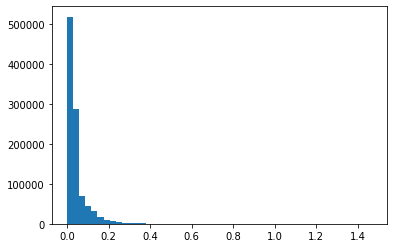

In [ ]:
plt.hist(b56[~np.isnan(b56)],50); #50 signifies the # of bins

We can see that most of the reflectance values are < 0.4. In order to show more contrast in the image, we can adjust the colorlimit (`clim`) to 0-0.4:

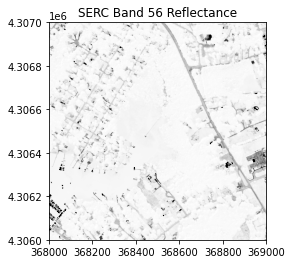

In [ ]:
serc_plot = plt.imshow(b56,extent=serc_ext,cmap='Greys',clim=(0,0.4))
plt.title('SERC Band 56 Reflectance');

Here you can see that adjusting the colorlimit displays features (eg. roads, buildings) much better than when we set the colormap limits to the entire range of reflectance values.

## Extension: Basic Image Processing -- Contrast Stretch & Histogram Equalization

We can also try out some basic image processing to better visualize the
reflectance data using the `ski-image` package.

Histogram equalization is a method in image processing of contrast adjustment
using the image's histogram. Stretching the histogram can improve the contrast
of a displayed image, as we will show how to do below.

 <figure>
	<a href="https://raw.githubusercontent.com/NEONScience/NEON-Data-Skills/main/graphics/hyperspectral-general/histogram_equalization.png">
	<img src="https://raw.githubusercontent.com/NEONScience/NEON-Data-Skills/main/graphics/hyperspectral-general/histogram_equalization.png"></a>
	<figcaption> Histogram equalization is a method in image processing of contrast adjustment
using the image's histogram. Stretching the histogram can improve the contrast
of a displayed image, as we will show how to do below.
	Source: <a href="https://en.wikipedia.org/wiki/Talk%3AHistogram_equalization#/media/File:Histogrammspreizung.png"> Wikipedia - Public Domain </a>
	</figcaption>
</figure>


*The following tutorial section is adapted from skikit-image's tutorial
<a href="http://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_equalize.html#sphx-glr-auto-examples-color-exposure-plot-equalize-py" target="_blank"> Histogram Equalization</a>.*

Below we demonstrate a widget to interactively display different linear contrast stretches:

### Explore the contrast stretch feature interactively using IPython widgets:

In [ ]:
from skimage import exposure
from IPython.html.widgets import *

def linearStretch(percent):
    pLow, pHigh = np.percentile(b56[~np.isnan(b56)], (percent,100-percent))
    print(pLow)
    print(pHigh)
    img_rescale = exposure.rescale_intensity(b56, in_range=(pLow,pHigh))
    plt.imshow(img_rescale,extent=serc_ext,cmap='gist_earth')
    #cbar = plt.colorbar(); cbar.set_label('Reflectance')
    plt.title('SERC Band 56 \n Linear ' + str(percent) + '% Contrast Stretch');
    ax = plt.gca()
    ax.ticklabel_format(useOffset=False, style='plain') #do not use scientific notation #
    rotatexlabels = plt.setp(ax.get_xticklabels(),rotation=90) #rotate x tick labels 90 degree

interact(linearStretch,percent=(0,50,1))

interactive(children=(IntSlider(value=25, description='percent', max=50), Output()), _dom_classes=('widget-int…

<function __main__.linearStretch(percent)>